# Misorientation profile
In this notebook, we will perform a misorientation profile analysis.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib widget

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

It is recommended to filter the data :

In [5]:
data.aita.filter(75)

## Extract profile

The function `xa.interactive_misorientation_profile` is displaying a figure on which you can click to choose the begining and the end of the profil.

Once you click on `Extract profile`, it returns you a `xarray.Dataset` with the results.

In [6]:
help(data.aita.interactive_misorientation_profile)

Help on method interactive_misorientation_profile in module xarrayaita.aita:

interactive_misorientation_profile(res=0, degre=True) method of xarrayaita.aita.aita instance
    Interactive misorientation profile for jupyter notebook
    
    :param res: step size of the profil
    :type res: float
    :param degre: return mis2o and mis2p in degre overwise in radian (default: true)
    :type degre: bool



<IPython.core.display.Javascript object>


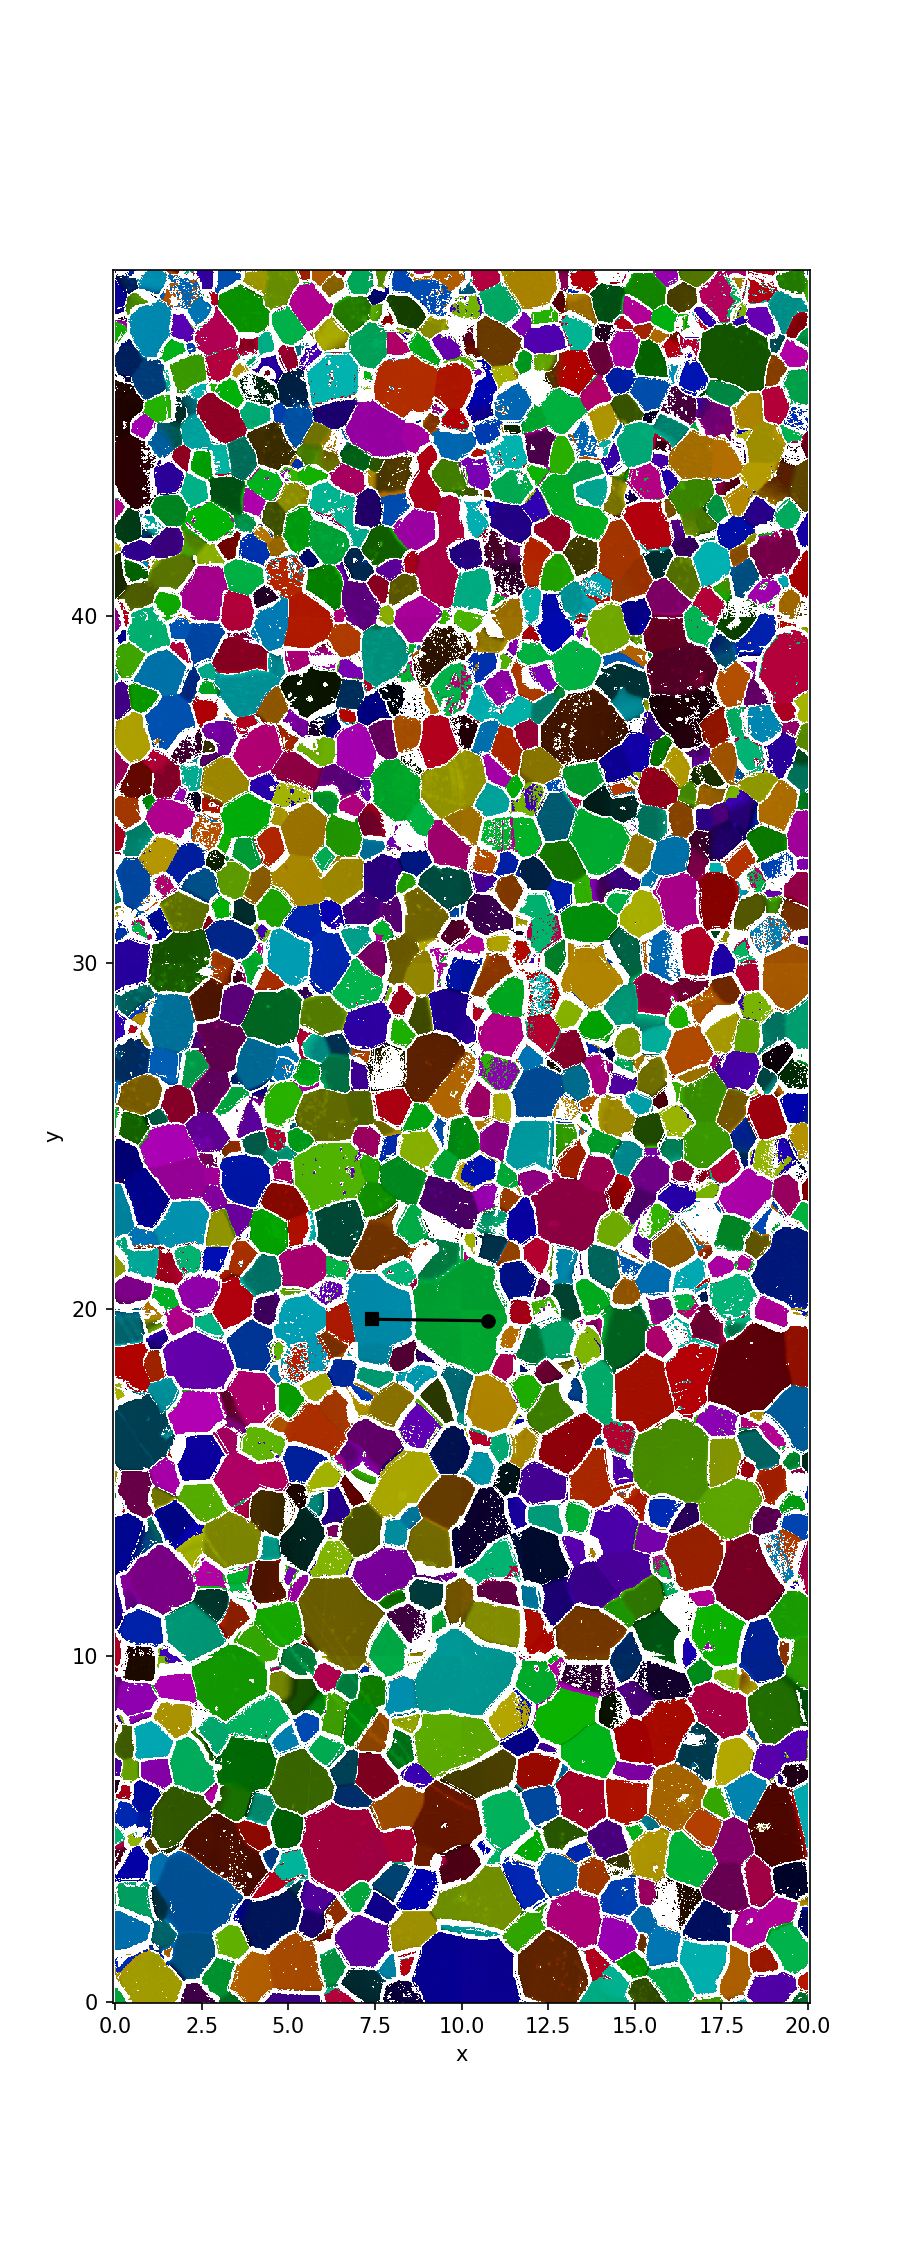

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Button(description='Extract profile', style=ButtonStyle())

In [7]:
pr=data.aita.interactive_misorientation_profile(res=0.1)

## The profile
### The `xarray.Dataset` structure
The profile are store in a `xarray.Dataset`.

In [8]:
pr.ds

<xarray.Dataset>
Dimensions:  (d: 151)
Coordinates:
  * d        (d) float64 0.0 0.02222 0.04445 0.06667 ... 3.267 3.289 3.311 3.334
Data variables:
    mis2i    (d) float64 0.0 0.2105 0.5186 0.2499 ... 48.3 48.14 48.02 47.96
    mis2p    (d) float64 nan 0.2105 0.333 0.4801 ... 0.2202 0.8002 0.2017 0.8033
Attributes:
    start:      [ 7.41712772 19.70789339]
    end:        [10.75046106 19.66460335]
    step_size:  0.1
    unit:       millimeters

- The dimensions `d` is the position along the profile
- `mis2i` variable is the **mis**orientation angle with the **i**nitial point
- `mis2p` variable is the **mis**orientation with the **p**revious point

In the attributes you can find the starting point, the ending point, the step size and the unit.

### Plot the results

<IPython.core.display.Javascript object>


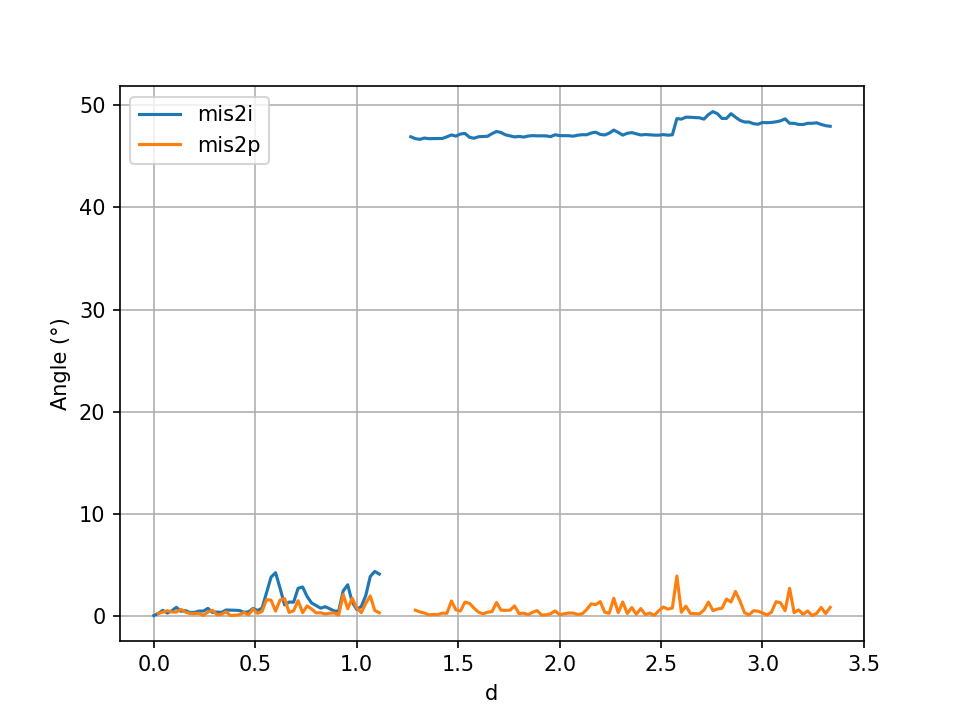

In [9]:
plt.figure()
pr.ds.mis2i.plot(label='mis2i')
pr.ds.mis2p.plot(label='mis2p')
plt.ylabel('Angle (°)')
plt.legend()
plt.grid()

### Replot the position of the profile
If you want to replot the position of the profile all the information needed are available in the `dataSet`.

In [10]:
data['OrientationSemi']=data.orientation.uvecs.calc_colormap()

<IPython.core.display.Javascript object>


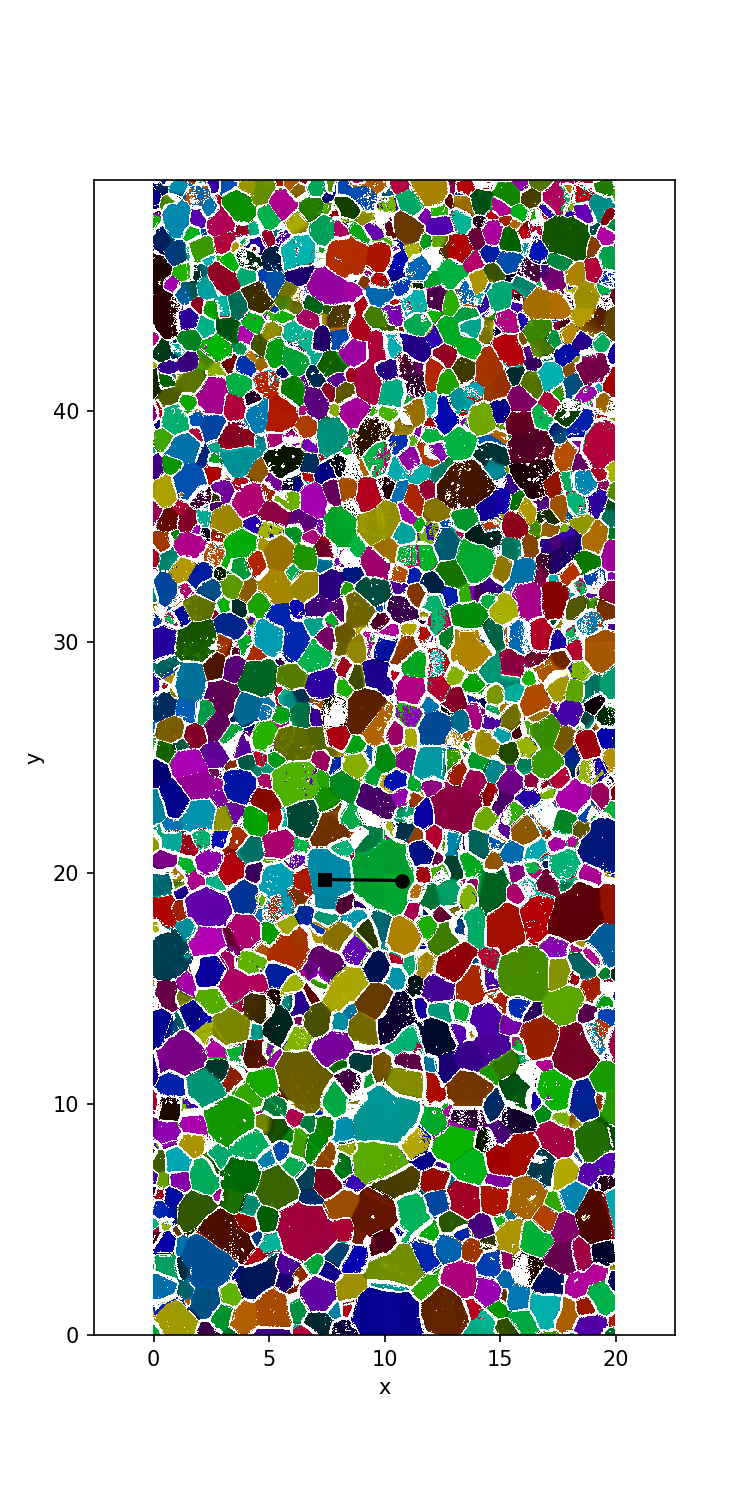

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

In [11]:
plt.figure(figsize=(5,10))
data.OrientationSemi.plot.imshow()
plt.plot(pr.ds.start[0],pr.ds.start[1],'sk')
plt.plot(pr.ds.end[0],pr.ds.end[1],'ok')
plt.plot([pr.ds.start[0],pr.ds.end[0]],[pr.ds.start[1],pr.ds.end[1]],'-k')
plt.axis('equal')